In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from nltk.tokenize import word_tokenize,regexp_tokenize

In [5]:
import os 
os.getcwd()

'C:\\Users\\HP\\Desktop\\project\\Insta Bot'

In [6]:
driver=webdriver.Chrome(executable_path='C:\\Users\\HP\\Downloads\\chromedriver')

In [7]:
driver.get("https://www.instagram.com/")
time.sleep(2)

In [4]:
def signIn(username,password):
    try:
        userNamePassBtns=driver.find_elements_by_css_selector("input")
        userNamePassBtns[0].send_keys(username)
        userNamePassBtns[1].send_keys(password)
        userNamePassBtns[1].send_keys(Keys.ENTER)
    except:
        print("ALready Signed In")

        
def turnOnNotification(turn_on):
    try:
        alert_obj=driver.find_elements_by_xpath("//button[contains(@class,'aOOlW')]")
        if turn_on:
            alert_obj[0].click()
        else :
            alert_obj[1].click()
    except:
        print("No Turn_on_notification PopUp")
        

##TASK 1
signIn("USERNAME","PASSWORD")
time.sleep(2)
turnOnNotification(False)
driver.current_window_handle

'CDwindow-67E9BBC24CAD923FAED56BFBE1D7DF04'

In [5]:
def searchForHandles(handle):
    driver.get("https://www.instagram.com/")
    turnOnNotification(False)
    wait=WebDriverWait(driver,10)
    searchBtn=wait.until(EC.presence_of_element_located((By.XPATH,"//input[contains(@class,'XTCLo')]")))
    searchBtn.clear()
    searchBtn.send_keys(handle)
    time.sleep(1.5)
    handles=driver.find_elements_by_class_name("Ap253")
    handleNames=[]
    #print(len(handnles))
    for i in handles:
        a=i.text
        if(a[0]!='#'):
            handleNames.append(a)
    return handleNames

listOfHandles=searchForHandles("food")
print(len(listOfHandles))
print(listOfHandles)

No Turn_on_notification PopUp
50
['foodtalkindia', 'foodnetwork', 'food', 'buzzfeedfood', 'food.marine', 'foodnetworkkitchen', 'dilsefoodie', 'sweety.foody', 'Horn Ok Please - Food Truck Festival', 'Fun N Food Village', 'BFF - Beer Food Feast', 'cooking.room', 'foodytops', 'theauthenticfoodstories', 'food.junktion', 'karanfoodfanatic', 'foodtalkglobal', 'food_lunatic', 'foodandwine', 'foodiesince96', 'yourfoodlab', 'foodieinboots', 'foodhallindia', 'foodinsider', 'food2goodbypriti', 'foodiesofindia', 'food_gambler', 'food_funda405060', 'delhifoodguide', 'foodie_incarnate', 'foodzaara', 'foodconnectindia', 'foodpandaindia', 'foodpandapooja', 'food_with_lazra', 'foodchoiceofmumbai', 'fuhnfood', 'food.os', 'food_era_', 'food_come_to_me', 'mumbaifoodie', 'food_blogger290', 'foodbloggerai', 'food_food_surat', 'foodtrails.india', 'food.sector', 'foodiewithluv', 'food_lover_journey', 'foodiedilse', 'kolkatafoodie']


In [6]:
def openAhandle(handle):
    driver.get("https://www.instagram.com/"+handle+"/")

In [7]:
########################################################################################################
########################################################################################################
##############INSTA BOT PART_2
########################################################################################################
########################################################################################################


In [8]:
##########################################################################
###### TASK1
##########################################################################
# Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
# From the list of instagram handles you obtained when you searched ‘food’ in previous project.
# Open the first 10 handles and find the top 5 which have the highest number of followers
# Now Find the number of posts these handles have done in the previous 3 days.
# Depict this information using a suitable graph.

In [9]:
def getCountFollowers(handle):
    openAhandle(handle)
    return (driver.find_elements_by_class_name('g47SY ')[1].get_attribute('title'))

In [65]:
followerCountS={}
count=0
ind=0
while(count<10):
    #print(listOfHandles[ind])
    try:
        followerCountS[listOfHandles[ind]]=(getCountFollowers(listOfHandles[ind]))
        count+=1
        ind+=1
    except:
        ind+=1

In [66]:
print(followerCountS)

{'foodtalkindia': '294,403', 'foodnetwork': '10,314,387', 'food': '23,009', 'buzzfeedfood': '3,750,113', 'food.marine': '361,205', 'foodnetworkkitchen': '480,105', 'dilsefoodie': '424,479', 'sweety.foody': '259,736', 'cooking.room': '648,304', 'foodytops': '468,047'}


In [67]:
def convertIntoInt(val):
    ans=0
    for i in val:
        if(i==','):
            continue
        ans*=10
        ans+=(int(i))
    return ans

In [68]:
followerCount={}
for i in followerCountS.keys():
    followerCount[i]=convertIntoInt(followerCountS[i])
print(followerCount)

{'foodtalkindia': 294403, 'foodnetwork': 10314387, 'food': 23009, 'buzzfeedfood': 3750113, 'food.marine': 361205, 'foodnetworkkitchen': 480105, 'dilsefoodie': 424479, 'sweety.foody': 259736, 'cooking.room': 648304, 'foodytops': 468047}


In [69]:
import operator
followersCount = dict(sorted(followerCount.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by Count value of followers: ',followersCount)

Dictionary in descending order by Count value of followers:  {'foodnetwork': 10314387, 'buzzfeedfood': 3750113, 'cooking.room': 648304, 'foodnetworkkitchen': 480105, 'foodytops': 468047, 'dilsefoodie': 424479, 'food.marine': 361205, 'foodtalkindia': 294403, 'sweety.foody': 259736, 'food': 23009}


In [70]:
# TOP 5 which have highest followers
count=0
for i in followersCount.keys():
    print(i+" : ",followersCount[i])
    count+=1
    if(count==5):
        break

foodnetwork :  10314387
buzzfeedfood :  3750113
cooking.room :  648304
foodnetworkkitchen :  480105
foodytops :  468047


In [16]:
from datetime import date,datetime 
  
def numOfDays(date1, date2): 
    return (date2-date1).days 

In [17]:
def getCountOfPost(handle,days):
    openAhandle(handle)
    driver.maximize_window()
    post1=driver.find_element_by_class_name("_9AhH0")
    post1.click()
    count=0
    wait=WebDriverWait(driver,2)
    time=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_1o9PC")))
    date1Str = time.get_attribute('datetime')[0:10]
    date1 = datetime.strptime(date1Str, '%Y-%m-%d').date()
    date2=date.today()
    while(numOfDays(date1,date2)<=days):
        count+=1
        try:
            wait=WebDriverWait(driver,2)
            time=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_1o9PC")))
            date1Str = time.get_attribute('datetime')[0:10]
            date1 = datetime.strptime(date1Str, '%Y-%m-%d').date()
        except:
            break
        try:
            nxtBtn=wait.until(EC.presence_of_element_located((By.XPATH,"//a[contains(@class,'coreSpriteRightPaginationArrow')]")))
            nxtBtn.click()
        except:
            break
    return count

In [18]:
count=0
post={}
for i in followersCount.keys():
    post[i]=getCountOfPost(i,3)
    count+=1
    if(count==5):
        break


In [19]:
count=0
for i in post.keys():
    print(i+" : ",post[i])
    count+=1
    if(count==5):
        break

foodnetwork :  26
buzzfeedfood :  0
cooking.room :  10
foodnetworkkitchen :  13
foodytops :  10


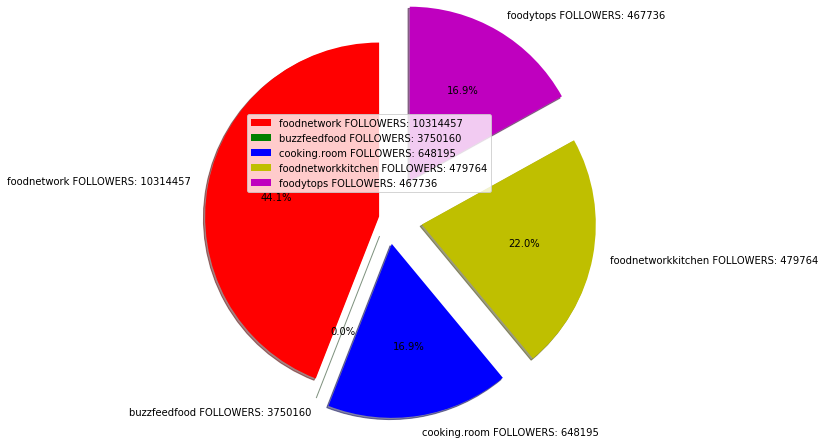

In [20]:
import matplotlib.pyplot as plt 
 
label = []
slices = [] 
count=0
for i in post.keys():
    label.append((i+" FOLLOWERS: "+str(followersCount[i])))
    slices.append(post[i])
    count+=1
    if(count==5):
        break
  

  
# color for each label 
colors = ['r', 'g', 'b', 'y' ,'m'] 
  
# plotting the pie chart 
plt.pie(slices, labels = label, colors=colors,  
        startangle=90, shadow = True, explode = (0.1, 0.2, 0.3, 0.4,0.5), 
        radius = 2, autopct = '%1.1f%%') 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show() 

In [21]:
########################################################################################
############# TASK 2
########################################################################################
# Your friend also needs a list of hashtags that he should use in his posts.
# Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
# Create a csv file with two columns : the word and its frequency
# Now, find the hashtags that were most popular among these bloggers
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [22]:
def findContentOfPosts(handle,num):
    openAhandle(handle)
    driver.maximize_window()
    post1=driver.find_element_by_class_name("_9AhH0")
    post1.click()
    count=0
    sentences=""
    while(count<num):
        count+=1
        try:
            wait=WebDriverWait(driver,2)
            handleName=wait.until(EC.presence_of_element_located((By.XPATH,"//h2[contains(@class,'_6lAjh')]/div/a"))).text
            if(handleName==handle):
                text=(driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span').text)
                sentences=sentences+" "+(text)
        except:
            count-=1
        try:
            nxtBtn=wait.until(EC.presence_of_element_located((By.XPATH,"//a[contains(@class,'coreSpriteRightPaginationArrow')]")))
            nxtBtn.click()
        except:
            break
    return sentences

In [23]:
data=[]
count=0
for i in post.keys():
    data.append(findContentOfPosts(i,10))
    count+=1
    if(count==5):
        break

In [24]:
text=""
for i in data:
    text=text+" "+(i)
print(text)

  Crispy Tortilla Pizza (with @jeffmauro) 🍕

Tortilla pizza is the perfect family-friendly dinner that won't break the bank! #WeCook

Get @jeffmauro's recipe on the @foodnetworkkitchen app.

#TheKitchen > Saturdays at 11a|10c. @Guarnaschelli's Favorite Spare Ribs 😋

It takes only five minutes to prep Alex's Dad's Spare Ribs!

Watch a new #SupermarketStakeout tonight at 10|9c.
Save the recipe on your @FoodNetworkKitchen app. This works in a pinch, and makes about ¼ cup baking powder — enough for several recipes! (If you don't have cornstarch, omit it. It acts as an anti-caking agent to prevent clumping during storage.) Did you know @amazonfiretv and Fire Tablet customers get a 1-year complimentary subscription to @FoodNetworkKitchen Premium? Find out how to redeem by going to foodtv.com/amazon. Dad's Burger (with @guyfieri)

There's bacon AND blue cheese literally seared DIRECTLY into this burger 😲 Find it at @dadslandpark 🍔
#DDD with @GuyFieri > Fridays at 9|8c @carlaphall's Biscuit Ha

In [25]:
# #####USING NLP For Processing Data
words=regexp_tokenize(text, pattern=r"\s|[\.,;']", gaps=True)


In [26]:
print(words)

['Crispy', 'Tortilla', 'Pizza', '(with', '@jeffmauro)', '🍕', 'Tortilla', 'pizza', 'is', 'the', 'perfect', 'family-friendly', 'dinner', 'that', 'won', 't', 'break', 'the', 'bank!', '#WeCook', 'Get', '@jeffmauro', 's', 'recipe', 'on', 'the', '@foodnetworkkitchen', 'app', '#TheKitchen', '>', 'Saturdays', 'at', '11a|10c', '@Guarnaschelli', 's', 'Favorite', 'Spare', 'Ribs', '😋', 'It', 'takes', 'only', 'five', 'minutes', 'to', 'prep', 'Alex', 's', 'Dad', 's', 'Spare', 'Ribs!', 'Watch', 'a', 'new', '#SupermarketStakeout', 'tonight', 'at', '10|9c', 'Save', 'the', 'recipe', 'on', 'your', '@FoodNetworkKitchen', 'app', 'This', 'works', 'in', 'a', 'pinch', 'and', 'makes', 'about', '¼', 'cup', 'baking', 'powder', '—', 'enough', 'for', 'several', 'recipes!', '(If', 'you', 'don', 't', 'have', 'cornstarch', 'omit', 'it', 'It', 'acts', 'as', 'an', 'anti-caking', 'agent', 'to', 'prevent', 'clumping', 'during', 'storage', ')', 'Did', 'you', 'know', '@amazonfiretv', 'and', 'Fire', 'Tablet', 'customers', '

In [27]:
countWords={}
for i in words:
    if(i in countWords):
        countWords[i]+=1
    else:
        countWords[i]=1

In [28]:
# keys = np.fromiter(Samples.keys(), dtype=float)
# vals = np.fromiter(Samples.values(), dtype=float)
wordArray=np.array(list(countWords.keys()))
freqArray=np.array(list(countWords.values()))
print(wordArray.shape)
print(freqArray.shape)
#wordArray=np.reshape(wordArray(wordArray.shape[1],-1))

(664,)
(664,)


In [29]:
dataFrame=pd.DataFrame({'word':wordArray,'frequency':freqArray})
print(dataFrame)

                   word  frequency
0                Crispy          1
1              Tortilla          2
2                 Pizza          1
3                 (with          4
4           @jeffmauro)          1
..                  ...        ...
659  @pacikanin_mutfagi          1
660           @bogazisi          1
661   @vladislav_pancha          1
662    @igorochaoficial          1
663         @chelsweets          1

[664 rows x 2 columns]


In [30]:
dataFrame.to_csv('word_freq.csv')

In [31]:
##HASTAGS
hastag={}
for i in countWords:
    if(i[0]=='#'):
        hastag[i]=countWords[i]
print(hastag)

{'#WeCook': 1, '#TheKitchen': 1, '#SupermarketStakeout': 1, '#DDD': 1, '#Chopped:': 1, '#BakeawayCamp': 1, '#ChoppedChallenge': 2, '#Chopped': 2, '#pizzalover': 1, '#donuts': 9, '#feelingcrafty': 9, '#boomboom': 9, '#breakfastlovers': 9, '#instadiy': 9, '#diyideas': 9, '#diycraft': 9, '#lifehacks': 9, '#lifehack': 9, '#icecreamsundae': 9, '#hacks': 9, '#lifetips': 9, '#oreos': 9, '#helpfultips': 9, '#lifehacking': 9, '#lifehacker': 9, '#diyfood': 9, '#useful': 9, '#diys': 9, '#easydiy': 9, '#diyfun': 9, '#diyvideos': 9, '#diyproject': 9, '#doityourself': 9, '#diytutorial': 9, '#diyfuture': 9, '#diyvideo': 9, '#tiramisulover': 9, '#boredpanda': 9, '#cakelover': 1, '#cupcakes': 2, '#cakeboss': 1, '#nutella': 1, '#chocolatecake': 2, '#chocolatelab': 1, '#1': 1, '#BetterWithAge': 1, '#FoodNetworkKitchen': 9, '#WeCookTogether': 2, '#Sweepstakes??': 1, '#Sweepstakes': 1}


In [32]:
#sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
hastags=dict(sorted(hastag.items(),key=operator.itemgetter(1),reverse=True))
print(hastags)

{'#donuts': 9, '#feelingcrafty': 9, '#boomboom': 9, '#breakfastlovers': 9, '#instadiy': 9, '#diyideas': 9, '#diycraft': 9, '#lifehacks': 9, '#lifehack': 9, '#icecreamsundae': 9, '#hacks': 9, '#lifetips': 9, '#oreos': 9, '#helpfultips': 9, '#lifehacking': 9, '#lifehacker': 9, '#diyfood': 9, '#useful': 9, '#diys': 9, '#easydiy': 9, '#diyfun': 9, '#diyvideos': 9, '#diyproject': 9, '#doityourself': 9, '#diytutorial': 9, '#diyfuture': 9, '#diyvideo': 9, '#tiramisulover': 9, '#boredpanda': 9, '#FoodNetworkKitchen': 9, '#ChoppedChallenge': 2, '#Chopped': 2, '#cupcakes': 2, '#chocolatecake': 2, '#WeCookTogether': 2, '#WeCook': 1, '#TheKitchen': 1, '#SupermarketStakeout': 1, '#DDD': 1, '#Chopped:': 1, '#BakeawayCamp': 1, '#pizzalover': 1, '#cakelover': 1, '#cakeboss': 1, '#nutella': 1, '#chocolatelab': 1, '#1': 1, '#BetterWithAge': 1, '#Sweepstakes??': 1, '#Sweepstakes': 1}


#donuts 9
#feelingcrafty 9
#boomboom 9
#breakfastlovers 9
#instadiy 9


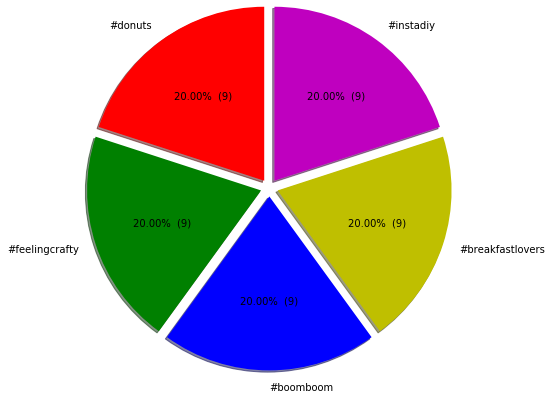

In [33]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

import matplotlib.pyplot as plt 
 
label = []
slices = [] 
count=0
for i in hastags.keys():
    print(i,hastags[i])
    label.append(i)
    slices.append(hastags[i])
    count+=1
    if(count==5):
        break
  

  
# color for each label 
colors = ['r', 'g', 'b', 'y' ,'m'] 
  
# plotting the pie chart 
plt.pie(slices, labels = label, colors=colors,  
        startangle=90, shadow = True, explode = (0.1, 0.1, 0.1, 0.1,0.1), 
        radius = 2,  autopct=make_autopct(slices)) 
  
# plotting legend 
#plt.legend() 
  
# showing the plot 
plt.show() 

In [34]:
####################################################################################
#################### TASK 3
####################################################################################
# You need to also calculate average followers : likes ratio for the obtained handles.
# Followers : Likes ratio is calculated as follows:
# Find out the likes of the top 10 posts of the 5 handles obtained earlier.
# Calculate the average likes for a handle.
# Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
# Create a bar graph to depict the above obtained information.

In [35]:

def countLikes(handle,num):
    openAhandle(handle)
    driver.maximize_window()
    likes=[]
    post1=driver.find_element_by_class_name("_9AhH0")
    post1.click()
    count=0
    while(count<num):
        try:
            wait=WebDriverWait(driver,3)
            viewBtn=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"vcOH2")))
            viewBtn.click()
            likeCount=driver.find_element_by_xpath("//div[@class='vJRqr']/span").text
            likes.append(convertIntoInt(likeCount))
            driver.find_element_by_class_name("QhbhU").click()
        except:
            likeCount=driver.find_element_by_xpath("//div[@class='Nm9Fw']/button/span").text
            likes.append(convertIntoInt(likeCount))
        try:
            wait=WebDriverWait(driver,3)
            nxtBtn=wait.until(EC.presence_of_element_located((By.XPATH,"//a[contains(@class,'coreSpriteRightPaginationArrow')]")))
            nxtBtn.click()
        except:
            print(handle,": No next Button")
            break
        count+=1
    return likes

In [37]:
# TOP 5 which have highest followers
avgLikes=[]
likes=[]
count=0
for i in followersCount.keys():
    a=countLikes(i,25)
    avgLikes.append(sum(a)/len(a))
    print(a)
    likes.append(a)
    count+=1
    if(count==5):
        break

[3502, 25704, 18464, 6786, 17213, 9302, 4544, 15843, 3584, 19113, 5043, 18862, 17178, 64408, 18873, 7476, 11980, 4438, 18448, 9191, 30440, 26097, 19647, 11019, 5172]
[4739, 3228, 4761, 11410, 5490, 3617, 6268, 2760, 4991, 7540, 964, 3300, 4132, 8612, 9296, 12581, 12410, 6046, 4192, 10408, 15811, 8745, 14131, 9916, 3872]
[1493, 8236, 2553, 1367, 4843, 8844, 4519, 3268, 5038, 2820, 3473, 9936, 4118, 4966, 4632, 12150, 27331, 4819, 10625, 7743, 9422, 10978, 11991, 3952, 11823]
[232, 638, 682, 1373, 1758, 1811, 931, 496, 2152, 739, 738, 1604, 591, 2676, 771, 3314, 702, 6076, 611, 1312, 821, 1477, 2064, 2258, 1053]
[970, 2499, 3460, 3521, 5219, 9996, 4577, 10932, 9377, 12179, 23747, 25089, 5978, 12944, 12997, 19629, 16652, 21888, 5147, 4974, 3604, 3730, 5575, 19493, 3535]


In [38]:
print(avgLikes)

[15693.08, 7168.8, 7237.6, 1475.2, 9908.48]


In [50]:
likesFollowersRatio=[]
handleName=[]
count=0
for i in followersCount.keys():
    print(i,":> Count of Followers = ",followersCount[i],", Average Likes On previous 20 Posts:> ",avgLikes[count])
    handleName.append(i)
    likesFollowersRatio.append(followersCount[i]/avgLikes[count])
    count+=1
    if(count==5):
        break

foodnetwork :> Count of Followers =  10314457 , Average Likes On previous 20 Posts:>  15693.08
buzzfeedfood :> Count of Followers =  3750160 , Average Likes On previous 20 Posts:>  7168.8
cooking.room :> Count of Followers =  648195 , Average Likes On previous 20 Posts:>  7237.6
foodnetworkkitchen :> Count of Followers =  479764 , Average Likes On previous 20 Posts:>  1475.2
foodytops :> Count of Followers =  467736 , Average Likes On previous 20 Posts:>  9908.48


In [51]:
for i in range(5):
    print(handleName[i]," followers : Likes ratio :> ",likesFollowersRatio[i])

foodnetwork  followers : Likes ratio :>  657.2614808565304
buzzfeedfood  followers : Likes ratio :>  523.1224193728378
cooking.room  followers : Likes ratio :>  89.55938432629601
foodnetworkkitchen  followers : Likes ratio :>  325.2196312364425
foodytops  followers : Likes ratio :>  47.205625888128154


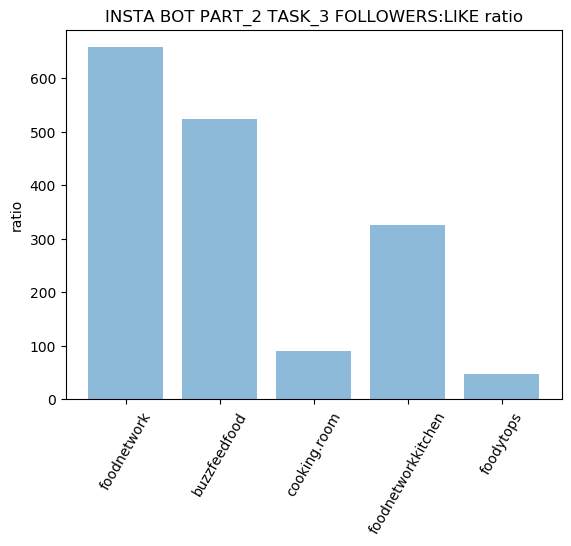

In [64]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = tuple(handleName)
y_pos = np.arange(len(objects))
performance = likesFollowersRatio

plt.bar(y_pos, performance, align='center',alpha=0.5)
plt.xticks(y_pos, objects,rotation="60")
plt.ylabel('ratio')
plt.title('INSTA BOT PART_2 TASK_3 FOLLOWERS:LIKE ratio')

plt.show()